### EDA for user engagement

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from utils import non_missing_values_table
from utils import * 
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.cluster import KMeans


In [7]:
df = pd.read_csv('../data/df_cleaned.csv')
pd.set_option('display.max_columns', None)

In [8]:
non_missing_values_table(df)

Your selected DataFrame has 55 columns.
There are 55 columns that have no missing values.


,Column Name,Data Type,Total Values,Unique Values
0,Bearer Id,float64,148506,134255
1,Start,object,148506,9988
2,Start ms,float64,148506,1000
3,End,object,148506,6401
4,End ms,float64,148506,1000
5,Dur. (ms),float64,148506,87449
6,IMSI,float64,148506,103903
7,MSISDN/Number,float64,148506,106469
8,IMEI,float64,148506,106477
9,Last Location Name,object,148506,45379


In [9]:
df.columns = df.columns.str.strip()

In [10]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [11]:
# Group by MSISDN and calculate metrics
engagement_metrics = df.groupby('MSISDN/Number').agg(
    sessions_frequency=('Bearer Id', 'count'),
    total_duration=('Dur. (ms)', 'sum'),
    total_ul_traffic=('Total UL (Bytes)', 'sum'),
    total_dl_traffic=('Total DL (Bytes)', 'sum')
).reset_index()

# Calculate total traffic after aggregation
engagement_metrics['total_traffic'] = engagement_metrics['total_ul_traffic'] + engagement_metrics['total_dl_traffic']

In [12]:
engagement_metrics.head()

,MSISDN/Number,sessions_frequency,total_duration,total_ul_traffic,total_dl_traffic,total_traffic
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08,8.786906e+08
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08,1.568596e+08
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08,5.959665e+08
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08,4.223207e+08
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09,1.457411e+09


In [13]:
engagement_metrics.tail()

,MSISDN/Number,sessions_frequency,total_duration,total_ul_traffic,total_dl_traffic,total_traffic
106464,3.378997e+10,1,160461.0,34066711.0,1.740564e+08,2.081231e+08
106465,3.378998e+10,2,210389.0,70831420.0,1.023862e+09,1.094693e+09
106466,3.379000e+10,1,8810.0,26716429.0,6.879252e+08,7.146416e+08
106467,3.379000e+10,1,140988.0,35732243.0,4.445751e+08,4.803073e+08
106468,3.397045e+10,3,1076554.0,154404803.0,8.131606e+08,9.675654e+08


In [14]:
engagement_metrics.describe()

,MSISDN/Number,sessions_frequency,total_duration,total_ul_traffic,total_dl_traffic,total_traffic
count,1.064690e+05,106469.000000,1.064690e+05,1.064690e+05,1.064690e+05,1.064690e+05
mean,3.367418e+10,1.394829,1.443334e+05,5.735447e+07,6.341784e+08,6.915328e+08
std,4.530340e+07,0.807014,1.556797e+05,3.569812e+07,4.649851e+08,4.915270e+08
min,3.360100e+10,1.000000,7.142000e+03,2.866892e+06,8.827082e+06,3.324901e+07
25%,3.365088e+10,1.000000,7.239800e+04,3.640186e+07,3.150017e+08,3.588186e+08
50%,3.366365e+10,1.000000,1.031360e+05,4.681312e+07,5.707401e+08,6.183423e+08
75%,3.368345e+10,2.000000,1.727990e+05,6.586156e+07,8.078515e+08,8.578911e+08
max,3.397045e+10,18.000000,6.674024e+06,7.295774e+08,8.156743e+09,8.846226e+09


### Identifying top customers by engagement

In [15]:
top_customers = {
    'top_sessions_frequency': engagement_metrics.nlargest(10, 'sessions_frequency'),
    'top_total_duration': engagement_metrics.nlargest(10, 'total_duration'),
    'top_total_traffic': engagement_metrics.nlargest(10, 'total_traffic')
}
# Print top 10 customers for each engagement metric
for metric, data in top_customers.items():
    print(f"{metric}:")
    display(data)
    print("\n")  

top_sessions_frequency:


,MSISDN/Number,sessions_frequency,total_duration,total_ul_traffic,total_dl_traffic,total_traffic
13467,3.362632e+10,18,5913621.0,669650721.0,7.301517e+09,7.971167e+09
6404,3.361489e+10,17,5895585.0,689483001.0,8.156743e+09,8.846226e+09
13123,3.362578e+10,17,6674024.0,729577380.0,7.770043e+09,8.499621e+09
36909,3.365973e+10,16,3951018.0,624260321.0,7.081602e+09,7.705863e+09
76077,3.367588e+10,15,4263129.0,581568792.0,7.309542e+09,7.891111e+09
92584,3.376054e+10,15,4928386.0,703478581.0,7.811295e+09,8.514774e+09
64883,3.366716e+10,13,4895364.0,566326364.0,5.052068e+09,5.618394e+09
658,3.360313e+10,12,4504332.0,435587631.0,4.540607e+09,4.976195e+09
1270,3.360452e+10,12,4124948.0,391775856.0,5.096079e+09,5.487855e+09
13934,3.362708e+10,12,3975196.0,445251947.0,5.309479e+09,5.754731e+09




top_total_duration:


,MSISDN/Number,sessions_frequency,total_duration,total_ul_traffic,total_dl_traffic,total_traffic
13123,3.362578e+10,17,6674024.0,729577380.0,7.770043e+09,8.499621e+09
13467,3.362632e+10,18,5913621.0,669650721.0,7.301517e+09,7.971167e+09
6404,3.361489e+10,17,5895585.0,689483001.0,8.156743e+09,8.846226e+09
92584,3.376054e+10,15,4928386.0,703478581.0,7.811295e+09,8.514774e+09
64883,3.366716e+10,13,4895364.0,566326364.0,5.052068e+09,5.618394e+09
658,3.360313e+10,12,4504332.0,435587631.0,4.540607e+09,4.976195e+09
76077,3.367588e+10,15,4263129.0,581568792.0,7.309542e+09,7.891111e+09
1270,3.360452e+10,12,4124948.0,391775856.0,5.096079e+09,5.487855e+09
86138,3.369879e+10,11,3981433.0,530343105.0,6.010556e+09,6.540899e+09
13934,3.362708e+10,12,3975196.0,445251947.0,5.309479e+09,5.754731e+09




top_total_traffic:


,MSISDN/Number,sessions_frequency,total_duration,total_ul_traffic,total_dl_traffic,total_traffic
6404,3.361489e+10,17,5895585.0,689483001.0,8.156743e+09,8.846226e+09
92584,3.376054e+10,15,4928386.0,703478581.0,7.811295e+09,8.514774e+09
13123,3.362578e+10,17,6674024.0,729577380.0,7.770043e+09,8.499621e+09
13467,3.362632e+10,18,5913621.0,669650721.0,7.301517e+09,7.971167e+09
76077,3.367588e+10,15,4263129.0,581568792.0,7.309542e+09,7.891111e+09
36909,3.365973e+10,16,3951018.0,624260321.0,7.081602e+09,7.705863e+09
62804,3.366646e+10,11,3636393.0,405060976.0,6.903440e+09,7.308501e+09
92239,3.376041e+10,12,3949449.0,521518890.0,6.610852e+09,7.132371e+09
57032,3.366471e+10,11,2927785.0,471244453.0,6.400774e+09,6.872018e+09
86138,3.369879e+10,11,3981433.0,530343105.0,6.010556e+09,6.540899e+09


### Clustering engagement

In [16]:
print(engagement_metrics.columns)

Index(['MSISDN/Number', 'sessions_frequency', 'total_duration',
       'total_ul_traffic', 'total_dl_traffic', 'total_traffic'],
      dtype='object')


In [17]:
#  Normalize metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['sessions_frequency', 'total_duration', 'total_traffic']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++')
engagement_metrics['cluster'] = kmeans.fit_predict(normalized_metrics)

In [18]:
if 'cluster' not in engagement_metrics.columns:
    print("The 'cluster' column is missing. Please verify your data preparation steps.")
else:
    cluster_summary = engagement_metrics.groupby('cluster').agg(
        min_sessions=('sessions_frequency', 'min'),
        max_sessions=('sessions_frequency', 'max'),
        avg_sessions=('sessions_frequency', 'mean'),
        total_sessions=('sessions_frequency', 'sum'),
        min_duration=('total_duration', 'min'),
        max_duration=('total_duration', 'max'),
        avg_duration=('total_duration', 'mean'),
        total_duration=('total_duration', 'sum'),
        min_traffic=('total_traffic', 'min'),
        max_traffic=('total_traffic', 'max'),
        avg_traffic=('total_traffic', 'mean'),
        total_traffic=('total_traffic', 'sum')
    ).reset_index()

In [19]:
cluster_summary

,cluster,min_sessions,max_sessions,avg_sessions,total_sessions,min_duration,max_duration,avg_duration,total_duration,min_traffic,max_traffic,avg_traffic,total_traffic
0,0,2,18,4.357821,16076,85554.0,6674024.0,617204.200867,2.276866e+09,542935647.0,8.846226e+09,2.259822e+09,8.336484e+12
1,1,1,2,1.028513,81812,7142.0,411762.0,102734.945326,8.171948e+09,33249009.0,9.507607e+08,4.953762e+08,3.940421e+13
2,2,1,4,2.178430,50618,18235.0,823524.0,211663.565846,4.918215e+09,161379366.0,2.512802e+09,1.114052e+09,2.588612e+13


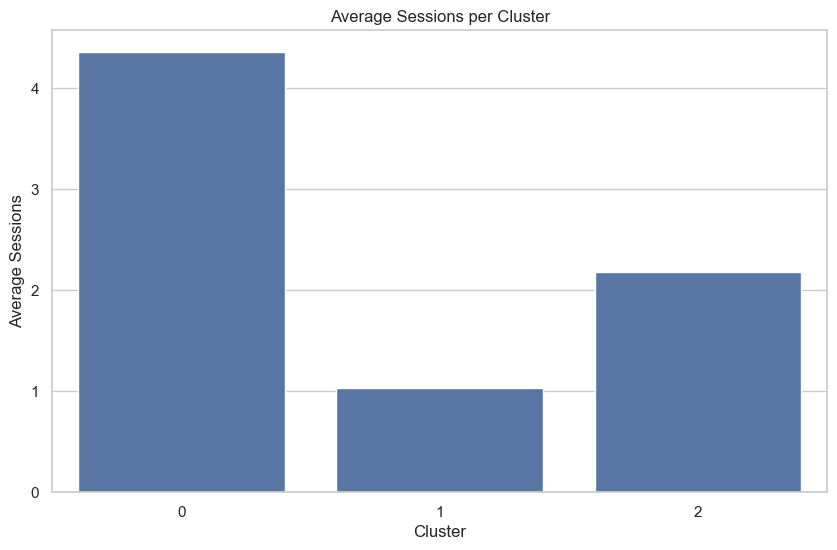

In [20]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot average sessions per cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='avg_sessions', data=cluster_summary)
plt.title('Average Sessions per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Sessions')
plt.show()

In [21]:
# Display insights based on the summary
for index, row in cluster_summary.iterrows():
    print(f"Cluster {row['cluster']}:")
    print(f" - Average Sessions: {row['avg_sessions']}")
    print(f" - Total Duration: {row['total_duration']}")
    print(f" - Total Traffic: {row['total_traffic']}\n")

Cluster 0.0:
 - Average Sessions: 4.357820547573868
 - Total Duration: 2276866297.0
 - Total Traffic: 8336484177381.0

Cluster 1.0:
 - Average Sessions: 1.0285125213718194
 - Total Duration: 8171948491.0
 - Total Traffic: 39404206364213.0

Cluster 2.0:
 - Average Sessions: 2.178430022379067
 - Total Duration: 4918214616.0
 - Total Traffic: 25886119771766.0



C:\Users\gtaye\AppData\Local\Temp\ipykernel_32\1973120999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='total_traffic', data=cluster_summary, palette='viridis')


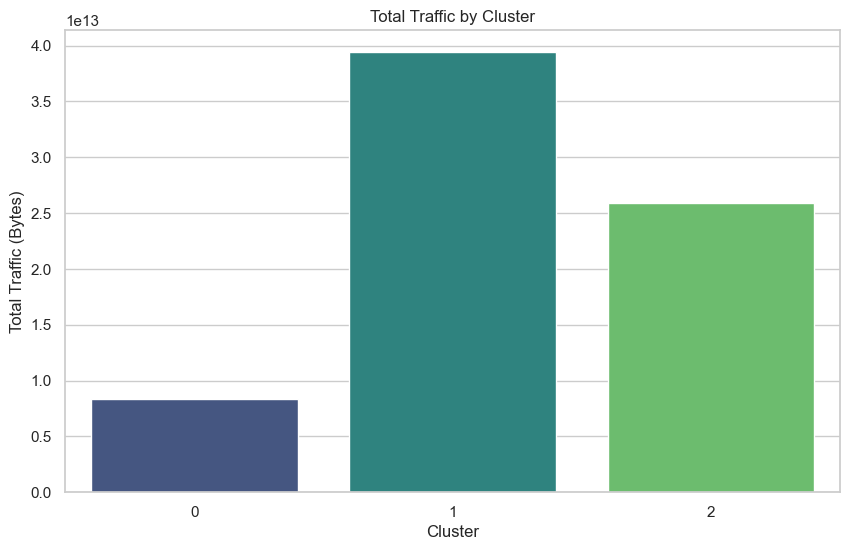

In [22]:
# Bar plot for total traffic by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='total_traffic', data=cluster_summary, palette='viridis')
plt.title('Total Traffic by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Traffic (Bytes)')
plt.show()

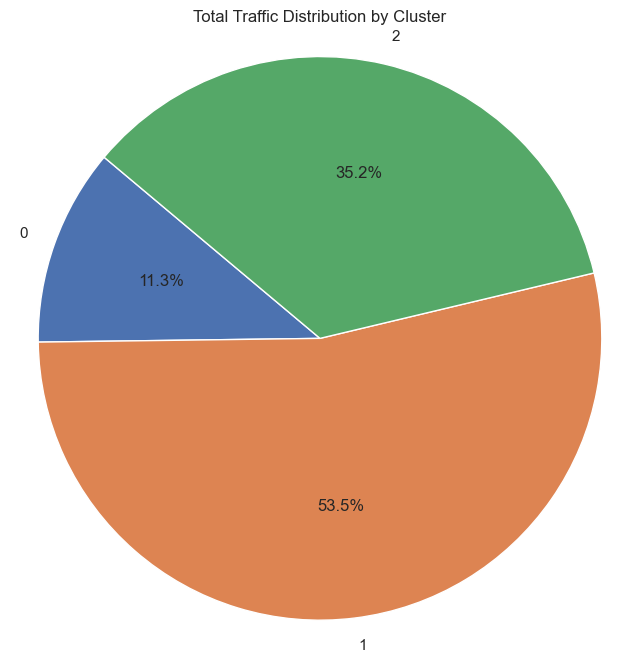

In [23]:
# Pie chart for the distribution of total traffic by cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_summary['total_traffic'], labels=cluster_summary['cluster'], autopct='%1.1f%%', startangle=140)
plt.title('Total Traffic Distribution by Cluster')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [26]:
application_columns = ['HTTP DL (Bytes)', 'Social Media DL (Bytes)', 'Google DL (Bytes)', 
                       'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 
                       'Gaming DL (Bytes)', 'Other DL (Bytes)']

# Create a DataFrame to store the results
app_engagement = df.groupby('MSISDN/Number')[application_columns].sum().reset_index()

# Get top 10 users per application
top_app_users = {app: app_engagement.nlargest(10, app) for app in application_columns}

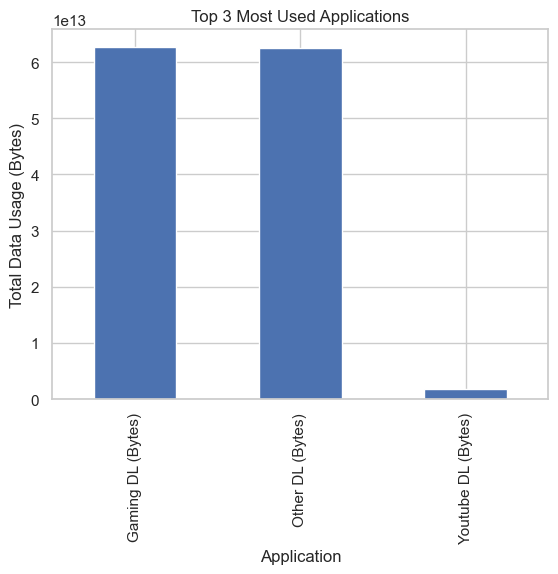

In [27]:
top_apps = app_engagement[application_columns].sum().nlargest(3)

top_apps.plot(kind='bar')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Data Usage (Bytes)')
plt.show()

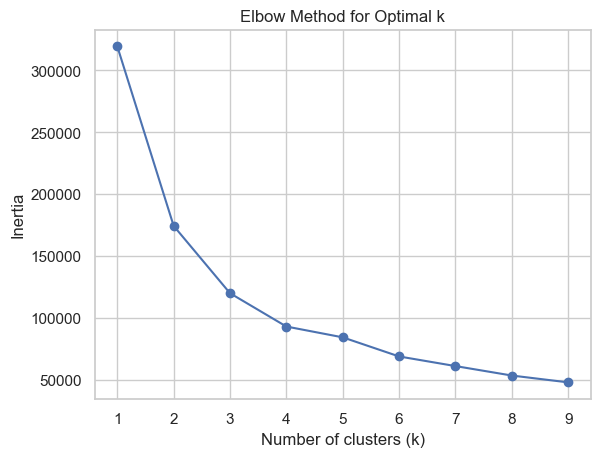

In [28]:
# Compute KMeans for a range of k values
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [29]:
engagement_metrics.to_csv('../data/engagement_metrics.csv', index=False)